In [1]:
import os, shutil

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp -r '/content/drive/MyDrive/Colab_Data/Cat_vs_Dog'  '/content/'
!ls -ls '/content/Cat_vs_Dog'

total 833960
    88 -rw------- 1 root root     88903 Nov 17 01:41 sampleSubmission.csv
     4 drwx------ 5 root root      4096 Nov 17 01:42 small
277664 -rw------- 1 root root 284321224 Nov 17 01:41 test1.zip
556204 -rw------- 1 root root 569546721 Nov 17 01:41 train.zip


In [4]:
!rm -rf '/content/Colab_Data/'
!unzip '/content/Cat_vs_Dog/test1.zip' -d '/content/datasets/' 
!unzip '/content/Cat_vs_Dog/train.zip' -d '/content/datasets/' 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/datasets/train/dog.5499.jpg  
  inflating: /content/datasets/train/dog.55.jpg  
  inflating: /content/datasets/train/dog.550.jpg  
  inflating: /content/datasets/train/dog.5500.jpg  
  inflating: /content/datasets/train/dog.5501.jpg  
  inflating: /content/datasets/train/dog.5502.jpg  
  inflating: /content/datasets/train/dog.5503.jpg  
  inflating: /content/datasets/train/dog.5504.jpg  
  inflating: /content/datasets/train/dog.5505.jpg  
  inflating: /content/datasets/train/dog.5506.jpg  
  inflating: /content/datasets/train/dog.5507.jpg  
  inflating: /content/datasets/train/dog.5508.jpg  
  inflating: /content/datasets/train/dog.5509.jpg  
  inflating: /content/datasets/train/dog.551.jpg  
  inflating: /content/datasets/train/dog.5510.jpg  
  inflating: /content/datasets/train/dog.5511.jpg  
  inflating: /content/datasets/train/dog.5512.jpg  
  inflating: /content/datasets/train/dog.5513.jpg  
  inflating: /content/datasets/t

### VGG16
* ImageNet 데이터를 활용한 학습
* 1400만개 레이블 이미지, 1000여개 클래스
* 2014년 이미지넷 대회에서 2위 한 모델

In [5]:
from keras.applications import VGG16

conv_base=VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

58892288/58889256 [==============================] - 0s 0us/step


In [6]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


* VGG16 합성곱 기반층은 14,714,688개의 데이터.

In [10]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
ori_dataset_dir = '/content/datasets/train/'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = '/content/datasets/small/'
# 반복실행을 위해 디렉터리 삭제
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)
# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

val_dir = os.path.join(base_dir, 'validation')
os.mkdir(val_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
val_cats_dir = os.path.join(val_dir, 'cats')
os.mkdir(val_cats_dir)

# 검증용 강아지 사진 디렉터리
val_dogs_dir = os.path.join(val_dir, 'dogs')
os.mkdir(val_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [11]:
# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(val_cats_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(val_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [16]:
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [17]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

print('검증용 고양이 이미지 전체 개수:', len(os.listdir(val_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(val_dogs_dir)))

print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


In [18]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [19]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [20]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

In [21]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')
# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)
#####
train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
from keras import optimizers

In [24]:
# 이진 분류 : binary_crossentropy
# 다항 분류 : categorical_crossentropy (0,1 벡터 레이블)
# 다항 분류 : sparse_categorical_crossentropy (정수 레이블)
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # total_train // batch_size
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,  # total_val // batch_size
      verbose=2)
### 
model.save('cats_and_dogs_small_3_dataAug_VGG_30_epoch.h5')

Epoch 1/30
100/100 - 24s - loss: 0.3772 - acc: 0.8245 - val_loss: 0.2069 - val_acc: 0.9110
Epoch 2/30
100/100 - 24s - loss: 0.2117 - acc: 0.9120 - val_loss: 0.1346 - val_acc: 0.9460
Epoch 3/30
100/100 - 24s - loss: 0.1459 - acc: 0.9465 - val_loss: 0.1863 - val_acc: 0.9320
Epoch 4/30
100/100 - 24s - loss: 0.1190 - acc: 0.9560 - val_loss: 0.1079 - val_acc: 0.9510
Epoch 5/30
100/100 - 24s - loss: 0.0827 - acc: 0.9690 - val_loss: 0.0922 - val_acc: 0.9680
Epoch 6/30
100/100 - 24s - loss: 0.0803 - acc: 0.9715 - val_loss: 0.1247 - val_acc: 0.9600
Epoch 7/30
100/100 - 24s - loss: 0.0703 - acc: 0.9760 - val_loss: 0.1142 - val_acc: 0.9560
Epoch 8/30
100/100 - 24s - loss: 0.0464 - acc: 0.9855 - val_loss: 0.1527 - val_acc: 0.9520
Epoch 9/30
100/100 - 24s - loss: 0.0382 - acc: 0.9845 - val_loss: 0.1301 - val_acc: 0.9610
Epoch 10/30
100/100 - 24s - loss: 0.0568 - acc: 0.9805 - val_loss: 0.1673 - val_acc: 0.9480
Epoch 11/30
100/100 - 24s - loss: 0.0298 - acc: 0.9925 - val_loss: 0.1127 - val_acc: 0.97

In [25]:
import matplotlib.pyplot as plt

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

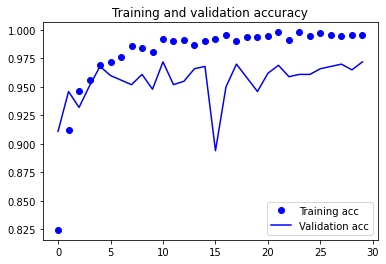

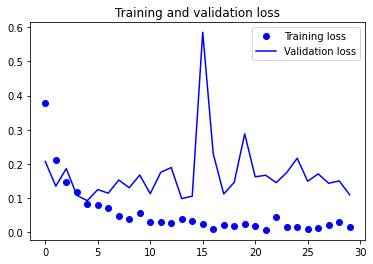

In [27]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers


In [29]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, 
                                   width_shift_range=0.1,height_shift_range=0.1, 
                                   shear_range=0.1, zoom_range=0.1, 
                                   horizontal_flip=True, fill_mode='nearest')


In [31]:
# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # 타깃 디렉터리
        target_size=(150, 150), # 모든 이미지의 크기를 150 × 150로 변경
        batch_size=20,
        # binary_crossentropy 손실을 사용하므로 이진 레이블 필요
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
history = model.fit_generator(train_generator,
      steps_per_epoch=100,  # total_train // batch_size
      epochs=30, validation_data=validation_generator,
      validation_steps=50,  # total_val // batch_size
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 - 24s - loss: 0.0229 - acc: 0.9930 - val_loss: 0.1590 - val_acc: 0.9620
Epoch 2/30
100/100 - 24s - loss: 0.0140 - acc: 0.9960 - val_loss: 0.1442 - val_acc: 0.9680
Epoch 3/30
100/100 - 24s - loss: 0.0093 - acc: 0.9980 - val_loss: 0.2277 - val_acc: 0.9590
Epoch 4/30
100/100 - 24s - loss: 0.0051 - acc: 0.9980 - val_loss: 0.1470 - val_acc: 0.9680
Epoch 5/30
100/100 - 24s - loss: 0.0062 - acc: 0.9980 - val_loss: 0.2089 - val_acc: 0.9640
Epoch 6/30
100/100 - 24s - loss: 0.0109 - acc: 0.9960 - val_loss: 0.1926 - val_acc: 0.9640
Epoch 7/30
100/100 - 24s - loss: 0.0127 - acc: 0.9970 - val_loss: 0.1772 - val_acc: 0.9600
Epoch 8/30
100/100 - 24s - loss: 0.0085 - acc: 0.9960 - val_loss: 0.2066 - val_acc: 0.9610
Epoch 9/30
100/100 - 24s - loss: 0.0298 - acc: 0.9970 - val_loss: 0.2080 - val_acc: 0.9620
Epoch 10/30
100/100 - 24s - loss: 0.0076 - acc: 0.9990 - val_loss: 0.3781 - val_acc: 0.9590
Epoch 11/30
1

In [34]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  print(layer)
  print(layer.name)
## 
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  print(layer)
  print(layer.name)

  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # total_train // batch_size
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50,  # total_val // batch_size
      verbose=2)

Epoch 1/50
